<a href="https://colab.research.google.com/github/RedLinen/2021_ENCM369/blob/master/lab1_binary_classifier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab1: Binary image classifier

## 1. Setup
Install fastbook and setup Google drive connection.

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 14.8 MB/s 
     |████████████████████████████████| 1.2 MB 48.5 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 189 kB 37.8 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 51 kB 288 kB/s 
Mounted at /content/gdrive


Import necessary libraries

In [6]:
from fastbook import *
from fastai.vision.widgets import *

## 2. Download images 
Use Azure image search or DuckDuckGo to download 150 images of each class. Save images to Google drive.

In [ ]:
key = "XXX"

In [236]:

moose_results = search_images_bing(key, 'moose')
camel_results = search_images_bing(key,'camel')
moose_ims = moose_results.attrgot('thumbnailUrl')
camel_ims = camel_results.attrgot('thumbnailUrl')

len(moose_ims)

150

In [237]:
len(camel_ims)

150

### 2.1 Try it out
Similar to the lecture notebook, try out your query and plot a few of the resulting images to verify that your search returns sensible images.

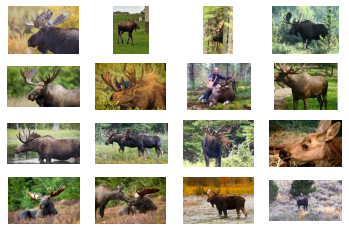

In [238]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    image_data = requests.get(moose_ims[i+4*j])
    image_data.raise_for_status()
    image = Image.open(BytesIO(image_data.content))
    axes[i][j].imshow(image)
    axes[i][j].imshow(image)
    axes[i][j].axis("off")
plt.show()


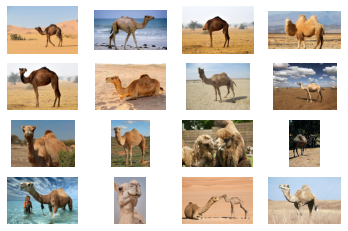

In [239]:
f, axes = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    image_data = requests.get(camel_ims[i+4*j])
    image_data.raise_for_status()
    image = Image.open(BytesIO(image_data.content))
    axes[i][j].imshow(image)
    axes[i][j].imshow(image)
    axes[i][j].axis("off")
plt.show()

### 2.2 Get images for the two classes
Download 150 images of each class. Save images to Google drive.  
Remove any corrupt images using `verify_images()`.

In [9]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/')
export_path.ls()

(#2) [Path('/content/gdrive/MyDrive/Colab Notebooks/moose'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel')]

In [127]:
animal_types = 'moose','camel'

In [136]:
for o in animal_types:
  dest = (export_path/o)
  dest.mkdir(exist_ok=True)
  results = search_images_bing(key, f'{o}')
  download_images(dest, urls=results.attrgot('contentUrl')) # I used "contentUrl" here  and "thumbnailUrl" above. The reason for this that 
                                                            # I get errors if I do anything else and I cannot figure out how to fix that.

In [137]:
fns = get_image_files(export_path)
fns

(#291) [Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000000.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000004.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000005.gif'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000002.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000001.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000006.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000011.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000008.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000003.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000007.jpeg')...]

In [138]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#2) [Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000009.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000041.jpg')]

In [139]:
failed.map(Path.unlink)

(#2) [None,None]

In [140]:
(export_path/'moose').ls()

(#145) [Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000000.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000004.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000005.gif'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000002.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000001.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000006.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000011.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000008.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000003.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/moose/00000007.jpeg')...]

In [141]:
(export_path/'camel').ls()

(#144) [Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000002.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000000.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000006.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000005.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000010.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000008.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000001.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000007.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000012.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/camel/00000004.jpg')...]

## 3. Setup image loaders
Setup image loaders, use 20% of images for validation, and show one batch for each training and validation dataset.

In [7]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [11]:
dls = animals.dataloaders(export_path)

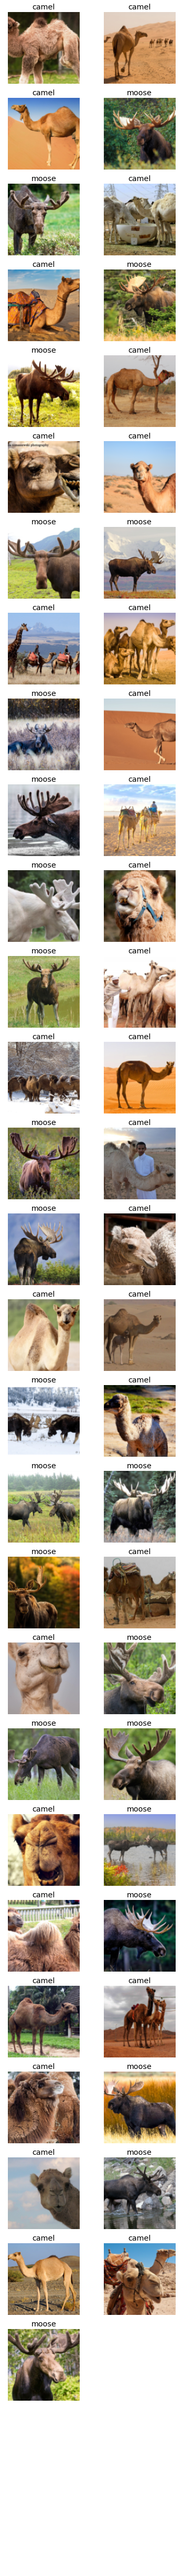

In [12]:
dls.valid.show_batch(max_n=150,nrows=30)

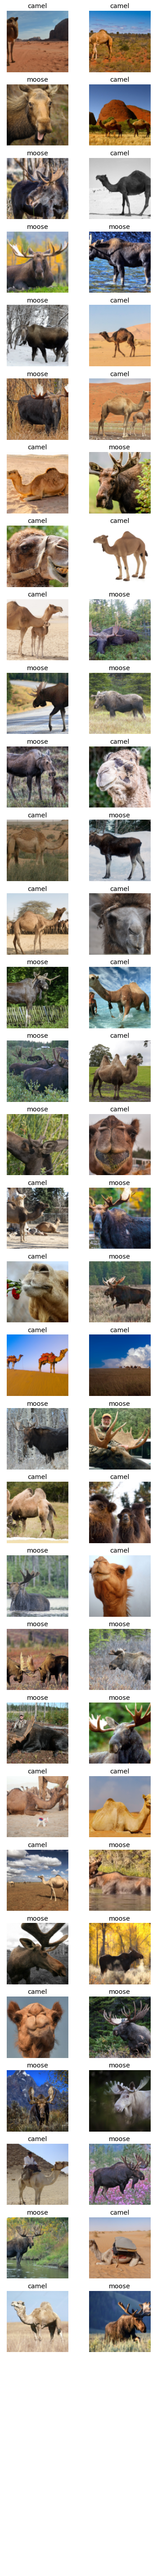

In [15]:
dls.train.show_batch(max_n=150,nrows=35)

**Question 1:** How many images of each class are in trainging and validation sets?

*YOUR ANSWER HERE*

## 4. Setup cnn learner
Setup a cnn learner with the dataloaders, `resnet18` architecture and `error_rate` as metric.

In [191]:
learn = cnn_learner(dls,resnet18,metrics=error_rate)

## 5. Train binary classifier
Fine tune for 10 epochs and show results.

In [213]:
# Please note:  The model keeps showing errors for corrupt image files. I can not seem to figure out how to prevent this.
#               I used "failed.map(Path.unlink)" above and deleted suspect images from my google drive but nothing seems to fix the problem.

In [235]:
learn.fine_tune(10)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

**Question 2:** Is the model overfitting? Why, why not?

As can be seen above the error rate goes up and down unpredictably and the validation score is very unstable, although it is trending down at the end. I would say that since the error rate is unstable, the validation loss is unstable, and the _final training loss score is much lower than the final validation loss score_ we are overfitting.

## 6. Analyze results

Plot confusion matrix.

Plot top 5 losses.


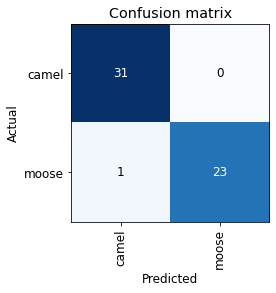

In [197]:
interp = ClassificationInterpretation.from_learner(learn, dl=dls.valid)
interp.plot_confusion_matrix()

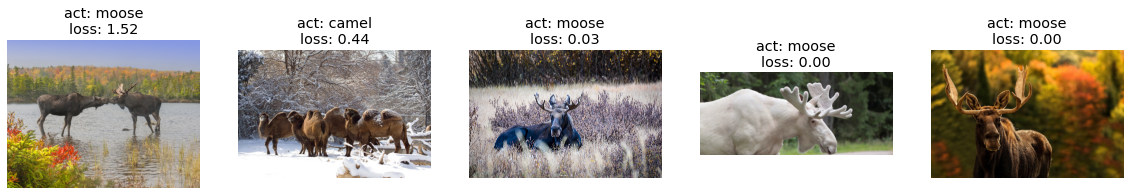

In [208]:
k = 5
losses, idxs = interp.top_losses(k)
predicted = interp.preds[idxs].argmax(axis=1)
fig, axs = plt.subplots(nrows=1, ncols=k, figsize=(20,10))

for ax, id, loss, pred in zip(axs, idxs, losses, predicted):
  img, actual = dls.valid_ds[id]
  img.show(ctx=ax)
  ax.set_title(f'act: {dls.vocab[actual.item()]}\nloss: {loss:.2f}')

**Question 3:** How many false positive, false negative errors?
<br>
<bre>

In simplest form we could say that the matrix shows 0 false negatives and 1 false positive. However if we view it for each class we could say this:




For Camels:<br>
            TP = 31<br>
            FN = 0<br>
            FP = 1<br>
            TN = 23<br>
<br>
For Moose:  
            TP = 23<br>
            FN = 1<br>
            FP = 0<br>
            TN = 31
        

## 7. Summary and Conclusion

Summarize:
- Type of classifier trained.
- Number of images of each class in the training validation sets
- Error rate achieved

*YOUR ANSWER HERE*

Conclusion:
- Are there any problems with data/labeling?<br><br>
Answer: data labeling seems good for both sets of images. It looks like every image labelled as having a moose in it has a moose in it, and the same is true for the camel images. It is worth noting that some images do contain people or other animals as well. However, this would likely be hard to avoid when collecting pictures from the web in this way.<br><br>
-Are you satisfied with model performance? Why, why not?<br><br>
Answer: The model was able to correctly label all but one image in the verification set most of the time. This seems fairly reasonable given how few images the model was given for learning. I am satisfied. It seems likely that better results could achieved with a larger collection of images though.




## 8. Reflection
Include a sentence or two about 
- what you liked or disliked, 
- found interesting, confusing, challangeing, motivating 

while working on this assignment.

Reflection: Working on this lab was really frustrating. Weird bugs kept showing up and then I lost GPU usage on Colab just as I was finishing. Some days things just don't go well. This was one.